<a href="https://colab.research.google.com/github/manavdewan02/Houseprediction-Asst2/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all necessary files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#dataset 
house_prices=pd.read_csv(r'https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv')

In [ ]:
house_prices

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
house_prices.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#part1. EDA (Univariate, Multivariate, KDE, Pearson Correlation)

In [ ]:
#stats for Sale Price column
house_prices[['SalePrice']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.19589,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


C:\python 39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

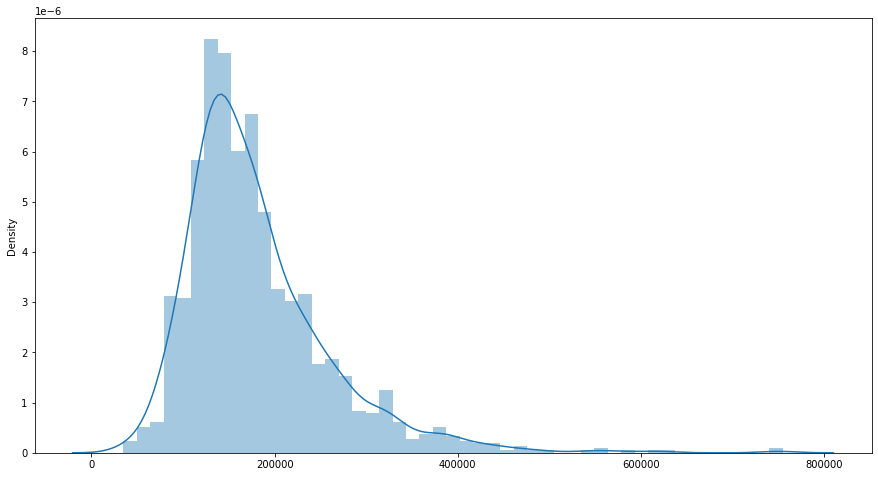

In [ ]:
#univariate
#histogram plot
plt.figure(figsize=(15,8))
sns.distplot(x=house_prices['SalePrice'])

In [ ]:
house_prices[['GrLivArea']]

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198
...,...
1455,1647
1456,2073
1457,2340
1458,1078


C:\python 39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


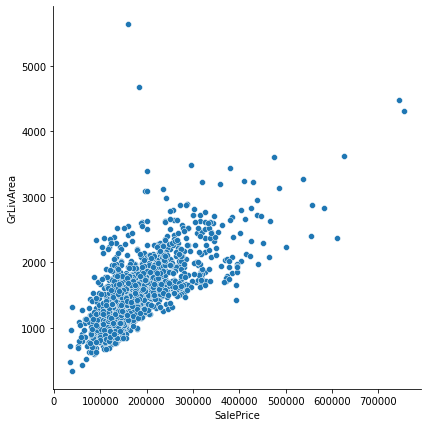

In [ ]:
#multivariate
# GrLivArea: Above grade (ground) living area square feet
#pairplot between GrLivArea column and SalePrice column
sns.pairplot(house_prices,x_vars=['SalePrice'],y_vars=['GrLivArea'],size=6);

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

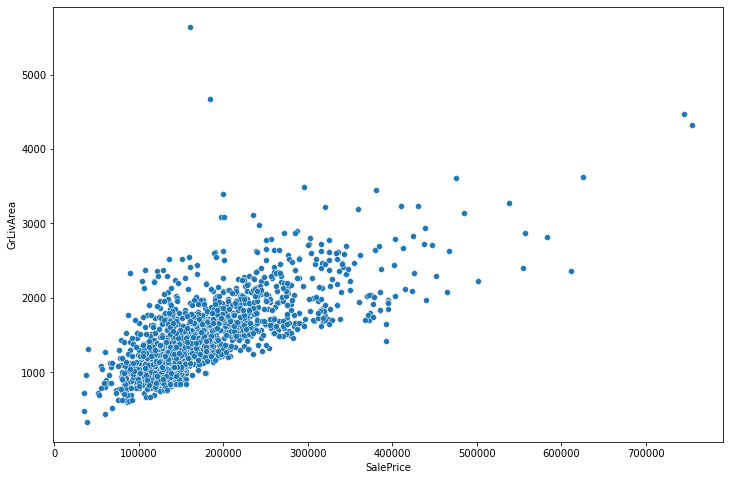

In [ ]:
#scatter plot
plt.figure(figsize=(12,8))
sns.scatterplot(x='SalePrice',y='GrLivArea',data=house_prices)

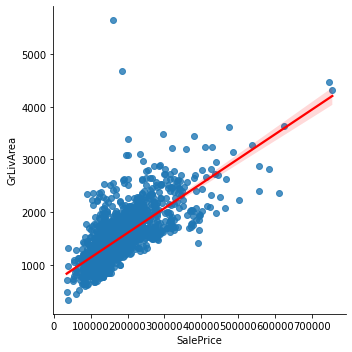

In [ ]:
#lmplot
sns.lmplot(x='SalePrice',y='GrLivArea',data=house_prices,line_kws={'color':'red'})

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

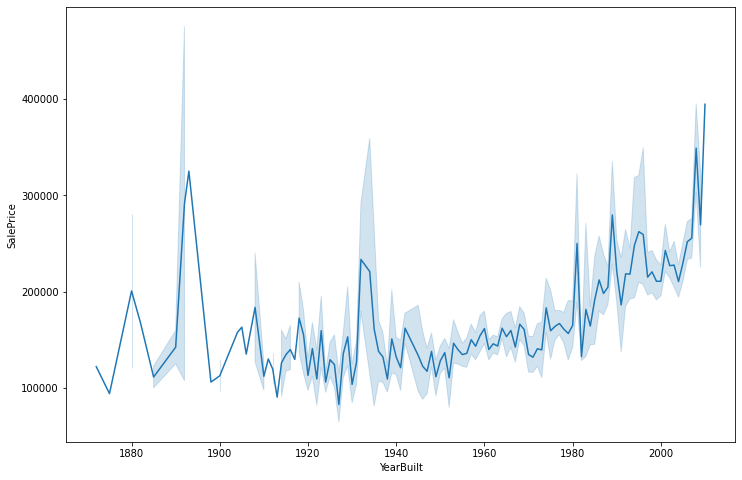

In [ ]:
#line plot
#lets check prices according to different years
plt.figure(figsize=(12,8))
sns.lineplot(x='YearBuilt',y='SalePrice',data=house_prices)

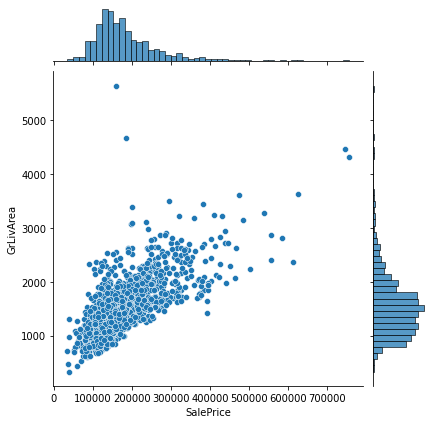

In [ ]:
#jointplot
sns.jointplot(x='SalePrice',y='GrLivArea',data=house_prices)

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

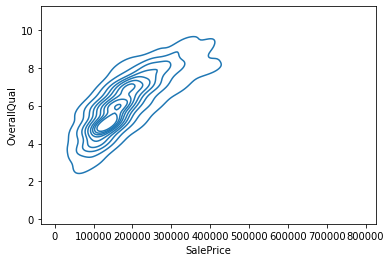

In [ ]:
#kernel density estimator plot, KDE
sns.kdeplot(x='SalePrice',y='OverallQual',data=house_prices)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

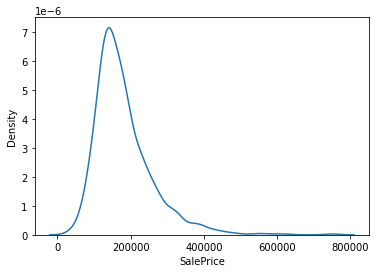

In [ ]:
sns.kdeplot(house_prices['SalePrice'])

In [ ]:
#pearson correlation
house_prices.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

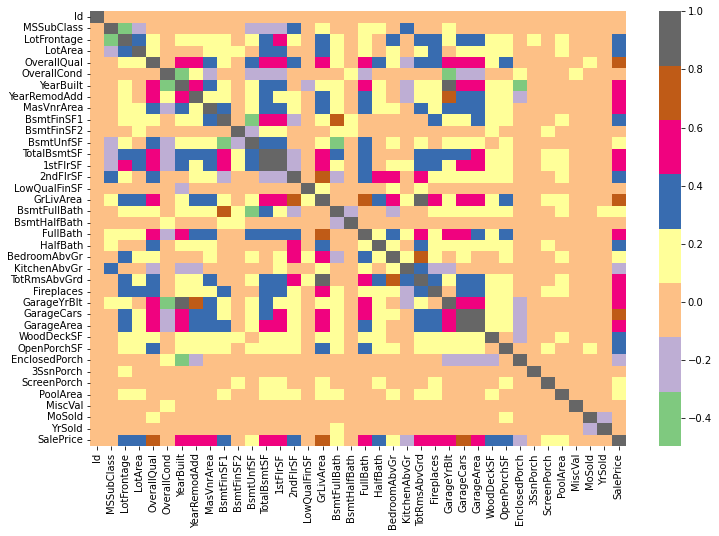

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(house_prices.corr(),cmap='Accent')

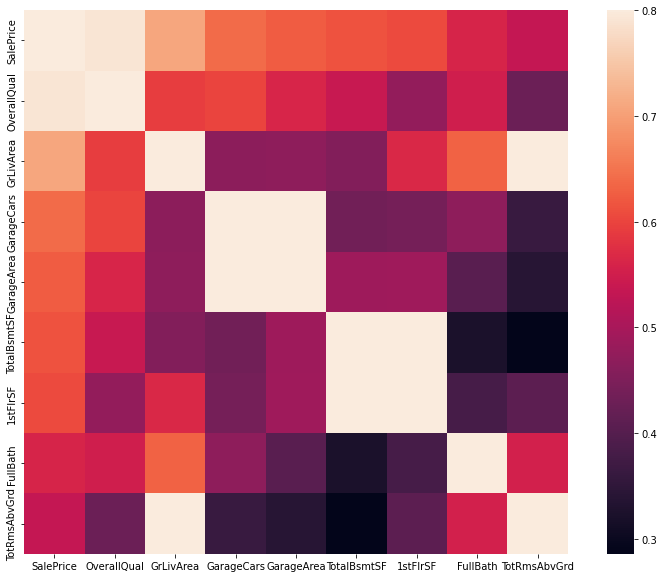

In [ ]:
k = 9 #number of variables for heatmap
cols = house_prices.corr().nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(house_prices[cols].corr(), vmax=.8, square=True);

In [ ]:
# Data Preprocessing (Imputation, create at least 2 new features)
#imputation
#imputation, which synthesizes statistically relevant data for missing values
#simply needs to remove missing values
#approach is to do it by filling missing values with average(mean)
#lets check no. of null values
pd.set_option('display.max_rows',1460) 
house_prices.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
house_prices.shape

(1460, 81)

In [ ]:
house_prices.info() #can find null elements using info as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
total = house_prices.isnull().sum().sort_values(ascending=False)
percent = (house_prices.isnull().sum()/house_prices.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [ ]:
#total 19 numerical columns
missing_data.head(19)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


C:\python 39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

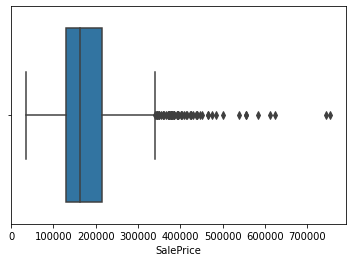

In [ ]:
sns.boxplot(house_prices['SalePrice'])



In [ ]:
#quartile 1
q1=house_prices['SalePrice'].quantile(0.25)
q1

129975.0

In [ ]:
#third quartile
q3=house_prices['SalePrice'].quantile(0.75)
q3

214000.0

In [ ]:
iqr=q3-q1 #inner quartile range

In [ ]:
iqr

84025.0

In [ ]:
lowerfence=q1-1.5*iqr
upperfence=q3+1.5*iqr

In [ ]:
house_prices[house_prices['SalePrice']>upperfence]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,New,Partial,372402
161,162,60,RL,110.0,13688,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,412500
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
231,232,60,RL,174.0,15138,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,403000


In [ ]:
ind=house_prices[house_prices['SalePrice']>upperfence].index

In [ ]:
house_prices.drop(ind,axis=0,inplace=True)

In [ ]:
house_prices.shape

(1399, 81)

C:\python 39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

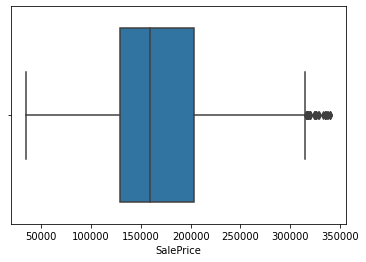

In [ ]:
sns.boxplot(house_prices['SalePrice'])

In [ ]:
q1=house_prices['SalePrice'].quantile(0.25)
q1

129000.0

In [ ]:
q3=house_prices['SalePrice'].quantile(0.75)
q3

203500.0

In [ ]:
iqr=q3-q1 

In [ ]:
lowerfence=q1-1.5*iqr
upperfence=q3+1.5*iqr

In [ ]:
house_prices[house_prices['SalePrice']>upperfence]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
45,46,120,RL,61.0,7658,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,319900
65,66,60,RL,76.0,9591,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,317000
118,119,60,RL,90.0,12376,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,320000
159,160,60,RL,134.0,19378,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,3,2006,New,Partial,320000
167,168,60,RL,86.0,10562,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,325624
238,239,20,RL,93.0,12030,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,318000
326,327,120,RL,32.0,10846,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,Con,Normal,324000
350,351,120,RL,68.0,7820,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,318061
377,378,60,FV,102.0,11143,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,340000


In [ ]:
ind=house_prices[house_prices['SalePrice']>upperfence].index

In [ ]:
house_prices.drop(ind,axis=0,inplace=True)

In [ ]:
house_prices.shape

(1366, 81)

C:\python 39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

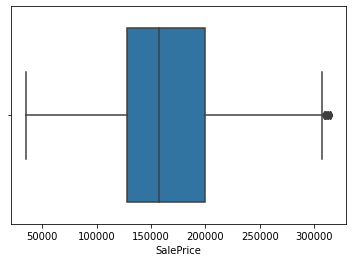

In [ ]:
sns.boxplot(house_prices['SalePrice'])

In [ ]:
q1=house_prices['SalePrice'].quantile(0.25)
q3=house_prices['SalePrice'].quantile(0.75)
iqr=q3-q1 
lowerfence=q1-1.5*iqr
upperfence=q3+1.5*iqr
house_prices[house_prices['SalePrice']>upperfence]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
35,36,60,RL,108.0,13418,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,309000
190,191,70,RL,70.0,10570,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,315000
196,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,311872
218,219,50,RL,NaN,15660,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,311500
423,424,60,RL,80.0,9200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,315000
540,541,20,RL,85.0,14601,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,315000
610,611,60,RL,NaN,11050,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,313000
618,619,20,RL,90.0,11694,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,314813
700,701,20,RL,85.0,14331,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,312500
1032,1033,60,RL,NaN,14541,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,310000


In [ ]:
ind=house_prices[house_prices['SalePrice']>upperfence].index

In [ ]:
house_prices.drop(ind,axis=0,inplace=True)

In [ ]:
house_prices.shape

(1354, 81)

C:\python 39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

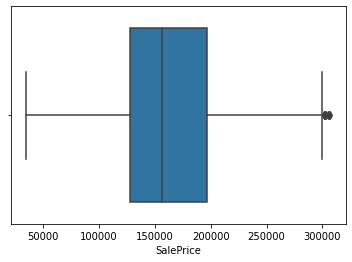

In [ ]:
sns.boxplot(house_prices['SalePrice'])

In [ ]:
q1=house_prices['SalePrice'].quantile(0.25)
q3=house_prices['SalePrice'].quantile(0.75)
iqr=q3-q1 
lowerfence=q1-1.5*iqr
upperfence=q3+1.5*iqr
house_prices[house_prices['SalePrice']>upperfence]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
745,746,60,RL,NaN,8963,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,299800


C:\python 39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

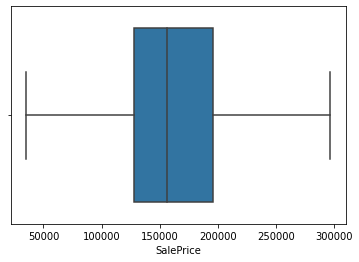

In [ ]:
ind=house_prices[house_prices['SalePrice']>upperfence].index
house_prices.drop(ind,axis=0,inplace=True)
sns.boxplot(house_prices['SalePrice'])

In [ ]:
house_prices.shape

(1344, 81)

In [ ]:
X=house_prices.loc[:,['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd']]
y=house_prices.loc[:,['SalePrice']]

In [ ]:
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd
0,7,1710,2,548,856,856,2,8
1,6,1262,2,460,1262,1262,2,6
2,7,1786,2,608,920,920,2,6
3,7,1717,3,642,756,961,1,7
4,8,2198,3,836,1145,1145,2,9
5,5,1362,2,480,796,796,1,5
7,7,2090,2,484,1107,1107,2,7
8,7,1774,2,468,952,1022,2,8
9,5,1077,1,205,991,1077,1,5
10,5,1040,1,384,1040,1040,1,5


In [ ]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
5,143000
7,200000
8,129900
9,118000
10,129500


In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=45)

In [ ]:
X_train

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd
847,5,864,1,338,864,864,1,5
107,5,789,1,250,789,789,1,5
1025,5,882,2,461,882,882,1,5
448,6,1376,1,198,780,780,2,7
872,5,910,2,414,105,910,1,5
1326,3,774,0,0,544,774,1,6
192,7,1431,2,666,1431,1431,2,6
536,7,1724,2,527,880,880,2,8
683,9,1668,3,702,1626,1668,2,7
736,3,1040,2,400,0,1040,2,6


In [ ]:
X_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd
1168,6,2108,2,540,1127,1236,2,7
1247,6,1034,3,888,1012,1034,1,6
213,5,990,2,576,990,990,1,5
712,8,1228,2,472,1228,1228,2,5
1082,7,1459,2,527,1459,1459,2,6
1019,7,1506,2,440,1362,1506,2,6
965,6,1484,2,393,783,783,2,8
18,5,1114,2,576,1114,1114,1,6
1276,6,1395,2,497,723,735,1,6
1139,5,1167,2,495,915,1167,1,6


In [ ]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()

In [ ]:
model_lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model_lr.predict(X_test)

In [ ]:
y_pred

array([[192175.06243602],
       [174901.68547487],
       [138098.70593996],
       [211461.27095714],
       [201900.0122045 ],
       [200520.15767928],
       [171402.97852233],
       [142233.58784494],
       [159643.76581838],
       [139453.39061672],
       [199731.93178571],
       [207546.68671467],
       [139361.15568917],
       [153115.76122799],
       [183932.66163485],
       [228847.14552485],
       [141992.51937091],
       [131994.73025671],
       [173324.03002086],
       [200850.39493907],
       [188807.73968859],
       [226919.1369321 ],
       [161060.67673757],
       [152507.16093275],
       [166528.75799067],
       [201133.59282434],
       [131649.33741965],
       [175333.15355162],
       [115906.34301053],
       [181890.91347254],
       [185187.586864  ],
       [235665.08877155],
       [193600.26831122],
       [150974.37459305],
       [222062.79531896],
       [204022.22749801],
       [154820.42311044],
       [192045.04550847],
       [1598

In [ ]:
y_test

,SalePrice
1168,235000
1247,169900
213,156000
712,189000
1082,192000
1019,213490
965,178900
18,159000
1276,162000
1139,144000


In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred)

18138.78036846436

In [ ]:
r2_score(y_test,y_pred)

0.7705474764804872

In [ ]:
#inference
X_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd
847,5,864,1,338,864,864,1,5
107,5,789,1,250,789,789,1,5
1025,5,882,2,461,882,882,1,5
448,6,1376,1,198,780,780,2,7
872,5,910,2,414,105,910,1,5


In [ ]:
model_lr.predict([[6,1200,2,250,700,700,2,7]])

C:\python 39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[163005.67055463]])